In [5]:
%matplotlib inline


# Labeling a pie and a donut


Welcome to the matplotlib bakery. We will create a pie and a donut
chart through the :meth:`pie method <matplotlib.axes.Axes.pie>` and
show how to label them with a :meth:`legend <matplotlib.axes.Axes.legend>`
as well as with :meth:`annotations <matplotlib.axes.Axes.annotate>`.



As usual we would start by defining the imports and create a figure with
subplots.
Now it's time for the pie. Starting with a pie recipe, we create the data
and a list of labels from it.

We can provide a function to the ``autopct`` argument, which will expand
automatic percentage labeling by showing absolute values; we calculate
the latter back from relative data and the known sum of all values.

We then create the pie and store the returned objects for later.
The first returned element of the returned tuple is a list of the wedges.
Those are
:class:`matplotlib.patches.Wedge <matplotlib.patches.Wedge>` patches, which
can directly be used as the handles for a legend. We can use the
legend's ``bbox_to_anchor`` argument to position the legend outside of
the pie. Here we use the axes coordinates ``(1, 0, 0.5, 1)`` together
with the location ``"center left"``; i.e.
the left central point of the legend will be at the left central point of the
bounding box, spanning from ``(1,0)`` to ``(1.5,1)`` in axes coordinates.



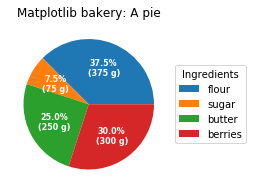

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

Now it's time for the donut. Starting with a donut recipe, we transcribe
the data to numbers (converting 1 egg to 50 g), and directly plot the pie.
The pie? Wait... it's going to be donut, is it not?
Well, as we see here, the donut is a pie, having a certain ``width`` set to
the wedges, which is different from its radius. It's as easy as it gets.
This is done via the ``wedgeprops`` argument.

We then want to label the wedges via
:meth:`annotations <matplotlib.axes.Axes.annotate>`. We first create some
dictionaries of common properties, which we can later pass as keyword
argument. We then iterate over all wedges and for each

* calculate the angle of the wedge's center,
* from that obtain the coordinates of the point at that angle on the
  circumference,
* determine the horizontal alignment of the text, depending on which side
  of the circle the point lies,
* update the connection style with the obtained angle to have the annotation
  arrow point outwards from the donut,
* finally, create the annotation with all the previously
  determined parameters.



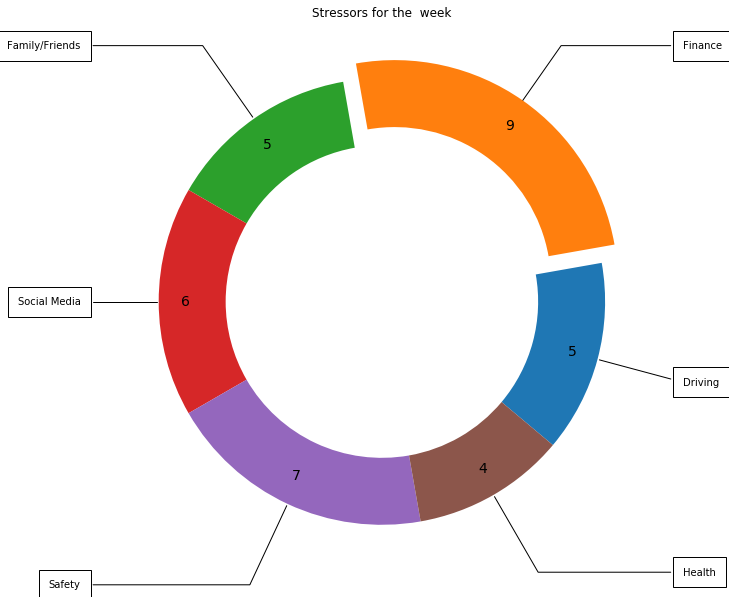

In [12]:
fig, ax = plt.subplots(figsize=(10, 15), subplot_kw=dict(aspect="equal"))

Stressors = ["Driving",
          "Finance",
          "Family/Friends",
          "Social Media",
          "Safety",
          "Health"]

data = [5, 9, 5, 6, 7, 4]
explode = (0, 0.1, 0, 0,0,0)
n = len(data)
wedges, texts = ax.pie(data, explode=explode,wedgeprops=dict(width=0.3), startangle=-40,labels=data,textprops={"fontsize":14},labeldistance = 1 - 2.5 / (4.5 * (n - 2)))

bbox_props = dict(boxstyle="square,pad=1", fc="w", ec="k", lw=0.99)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(Stressors[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Stressors for the  week")
plt.savefig("pie_donuts.png")
plt.show()

And here it is, the donut. Note however, that if we were to use this recipe,
the ingredients would suffice for around 6 donuts - producing one huge
donut is untested and might result in kitchen errors.



------------

References
""""""""""

The use of the following functions, methods, classes and modules is shown
in this example:



In [ ]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend